In [123]:
import numpy as np
import matplotlib.pyplot as plt

# group_A = np.zeros((15, 2)) # 앞의 값은 샘플의 수, 뒤의 값은 샘플의 디멘션
# group_B = np.zeros((15, 2)) # 앞의 값은 샘플의 수, 뒤의 값은 샘플의 디멘션
# group_C = np.zeros((15, 2)) # 앞의 값은 샘플의 수, 뒤의 값은 샘플의 디멘션

# 아래조건 구성하며 랜덤성 부여
group_A = np.random.uniform(100, 200, (15, 2))
group_B = np.random.uniform(0, 50, (15, 2))
group_C = np.column_stack((np.random.uniform(100, 200, 15), np.random.uniform(0, 50, 15)))

# 각 그룹마다 랜덤값을 부여함
# group_A는 100에서 200사이의 실수값
# group_B는 0에서 50사이의 실수값
# group_C는 X축은 100에서 200사이의 술수값, y축은 0에서 50사이의 실수값

# 각 그룹의 점들과 우리가 가지고 있는 현재 point와의 거리를 구하는 함수가 필요
def distance(p, a, metric='euclidean'):
    if metric == 'euclidean':
        return np.sqrt(np.sum((p - a) ** 2))
    elif metric == 'manhattan':
        return np.sum(np.abs(p - a))

# 함수화
def current_point(current_point, k = 5, metric='manhattan', visual=False):
  distances = []
  for point in group_A:
    distances.append((distance(current_point, point, metric), point, 'A'))
  for point in group_B:
    distances.append((distance(current_point, point, metric), point, 'B'))
  for point in group_C:
    distances.append((distance(current_point, point, metric), point, 'C'))

  # 거리 순서대로 정렬
  distances.sort(key=lambda x: x[0])

  # k개의 가장 가까운 이웃 선택
  n_n = distances[:k]

  # 각 그룹의 통계치를 나타내는 리스트
  stat = [0,0,0] # 제일 앞은 k개 중에 그룹 A에 해당하는 개수, 그룹 B에 해당하는 개수, 그룹 C에 해당하는 개수
  # 이 stat에서 최대로 큰 값의 위치를 구하면 그게 그룹이 됨

  for _, _, label in n_n:
    if label == 'A':
      stat[0] += 1
    elif label == 'B':
      stat[1] += 1
    else:
      stat[2] += 1

  # 가장 많은 점을 가진 그룹 결정
  index = stat.index(max(stat))

  # 결과 출력
  if index == 0:
    print("group A")
  elif index == 1:
    print("group B")
  else:
    print("group C")

  if visual:
    plt.figure(figsize=(10, 6))
    plt.scatter(group_A[:, 0], group_A[:, 1], color='red', label='group_A')
    plt.scatter(group_B[:, 0], group_B[:, 1], color='blue', label='group_B')
    plt.scatter(group_C[:, 0], group_C[:, 1], color='green', label='group_C')
    plt.scatter(current_point[0], current_point[1], color='black', marker='x', s=100, label='current_point')

    for _, point, label in n_n:
      plt.scatter(point[0], point[1], color='white', edgecolor='orange', linewidth=2, s=150, alpha=0.8)

    plt.title('kNN')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

group B


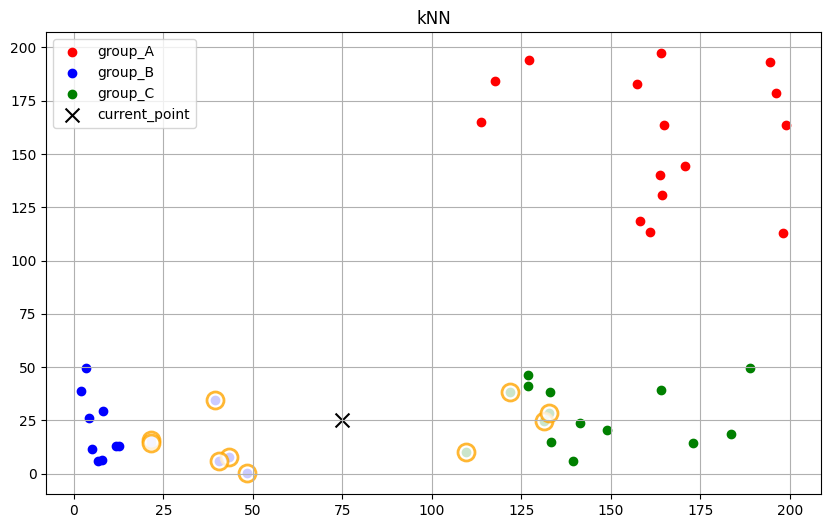

In [125]:
current_point(np.array([75, 25]), k = 10, metric='manhattan', visual = True)